# Instruction

DESCRIPTON
----------

This dataset is composed of 1000 samples with 35 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 5 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of a Support-
Vector Machine (implemented by sklearn.svm.LinearSVC) with that of a Random
Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to optimize
both algorithms' parameters and determine which one is best for this dataset. At
the end of the analysis, you should have chosen an algorithm and its optimal set
of parameters: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).


# Set Up

In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#In this project the random state will be set to random_state=1

# Import Data

In [2]:
df = pd.read_csv('Data.csv',index_col=0)
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,1,0.711627,0.062502,-2.680914,-1.177912,0.759159,0.075971,-2.340093,0.255656,0.101928,...,2.147259,0.123103,1.095480,-0.444486,-2.340093,1.025223,0.885469,-2.402318,0.701698,-1.172482
1,2,-0.943169,-0.912122,0.965644,0.531299,-0.438382,0.584344,-1.997109,0.595748,0.148369,...,-0.334431,0.735575,0.563420,2.118523,-1.997109,2.463172,-0.913081,-1.127192,-1.733284,-0.539453
2,2,1.632291,0.462689,1.524462,-2.242344,0.429435,-0.689518,0.133828,0.394869,1.023539,...,0.427510,-0.123659,0.323849,0.965996,0.133828,0.408971,-0.845356,3.748406,1.305448,0.593959
3,1,2.069895,-0.755984,1.197085,0.422616,-0.850216,-1.510831,1.253159,-0.083180,-0.588174,...,-0.166099,1.667438,1.725392,0.220712,1.253159,1.364778,-0.380726,-0.053370,-0.055609,1.358140
4,3,-1.122049,0.555666,-1.805555,-0.185836,-0.345829,0.350796,0.477232,-0.107639,-0.209640,...,0.293121,-1.762541,0.421072,0.508868,0.477232,-1.700476,-1.006235,1.703080,-0.064904,-1.167416


# Check for error , correlation and any extreme values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1000 non-null   int64  
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

In [4]:
corr_matrix = df.corr()
corr_matrix

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
label,1.000000,-0.003755,-0.011907,0.132185,0.033364,-0.005695,-0.024167,0.063149,0.045081,0.034834,...,0.010254,0.005249,-0.002500,-0.040250,0.063149,-0.045422,-0.031444,0.135226,0.002168,0.015377
feature_1,-0.003755,1.000000,0.032564,0.047634,0.009645,-0.060074,0.016100,-0.025725,-0.041437,-0.030105,...,0.019443,-0.027333,0.060613,-0.065036,-0.025725,-0.001129,0.007177,0.023452,0.029393,-0.012424
feature_2,-0.011907,0.032564,1.000000,-0.008140,0.003462,0.015832,-0.046783,0.014087,-0.056851,0.035727,...,0.023040,-0.024452,-0.025098,-0.003122,0.014087,-0.055682,0.031097,-0.052682,-0.017916,0.039979
feature_3,0.132185,0.047634,-0.008140,1.000000,-0.066153,-0.066911,-0.022556,-0.124040,-0.009820,0.005672,...,0.022216,-0.024335,0.001497,0.000142,-0.124040,-0.028110,-0.010524,0.008853,0.034583,-0.004564
feature_4,0.033364,0.009645,0.003462,-0.066153,1.000000,-0.015351,-0.012464,0.090665,0.001966,-0.020040,...,-0.040787,-0.001215,-0.052665,-0.001679,0.090665,-0.020538,0.010485,0.011752,0.025123,0.003792
feature_5,-0.005695,-0.060074,0.015832,-0.066911,-0.015351,1.000000,-0.025105,-0.006381,0.013680,0.021033,...,-0.021439,-0.005250,-0.004628,-0.058276,-0.006381,0.012777,-0.015684,-0.049149,0.061907,0.014134
feature_6,-0.024167,0.016100,-0.046783,-0.022556,-0.012464,-0.025105,1.000000,0.033310,0.018585,0.008624,...,-0.013500,0.024509,0.019755,0.016007,0.033310,0.045426,-0.001570,0.005167,-0.034049,0.001566
feature_7,0.063149,-0.025725,0.014087,-0.124040,0.090665,-0.006381,0.033310,1.000000,0.014302,0.011548,...,0.077587,-0.020756,-0.091142,-0.008442,1.000000,-0.018995,0.021950,0.138350,-0.008820,-0.037776
feature_8,0.045081,-0.041437,-0.056851,-0.009820,0.001966,0.013680,0.018585,0.014302,1.000000,0.000069,...,0.058693,0.041275,0.026467,0.012331,0.014302,-0.002976,0.009958,0.001779,0.008805,0.041888
feature_9,0.034834,-0.030105,0.035727,0.005672,-0.020040,0.021033,0.008624,0.011548,0.000069,1.000000,...,-0.013081,-0.003396,0.004773,0.017709,0.011548,0.022420,-0.047971,-0.016244,-0.018955,0.017571


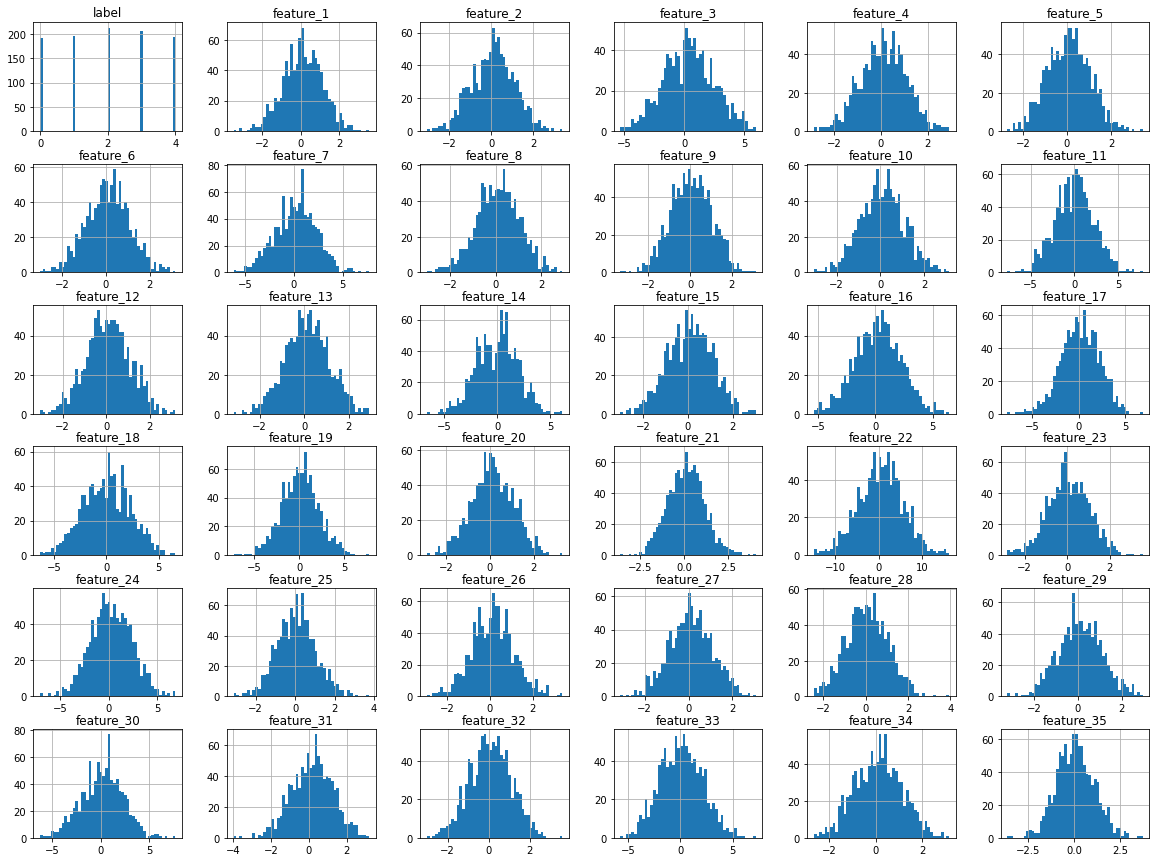

In [5]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

ll the variables seems to have a normal distribution with the mean There are no null values, no high level of correlation and aof 0

# Split and scale the data

We need to split the data into training and test set to avoid overfitting and underfitting.


We also scale the data since during SVM and PCA distance are very important, so it is necessary to scale the data first 

This data will be use in all 3 parts PCA, SVM and Random Forest


In [6]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size=0.3, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (Principal Component Analysis)

This is done to see if it is possible to do SVM in 2 dimensions since it will be easier for the us to interpret the result.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [9]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_train_scaled_pca

array([[-0.79527534, -2.54912567],
       [-0.13200191,  0.83084415],
       [ 0.71881133, -1.71898043],
       ...,
       [ 0.14762318, -1.07355239],
       [-0.99345103, -2.62417468],
       [ 0.11364713,  0.53264966]])

Text(0.5, 1.0, 'PCA')

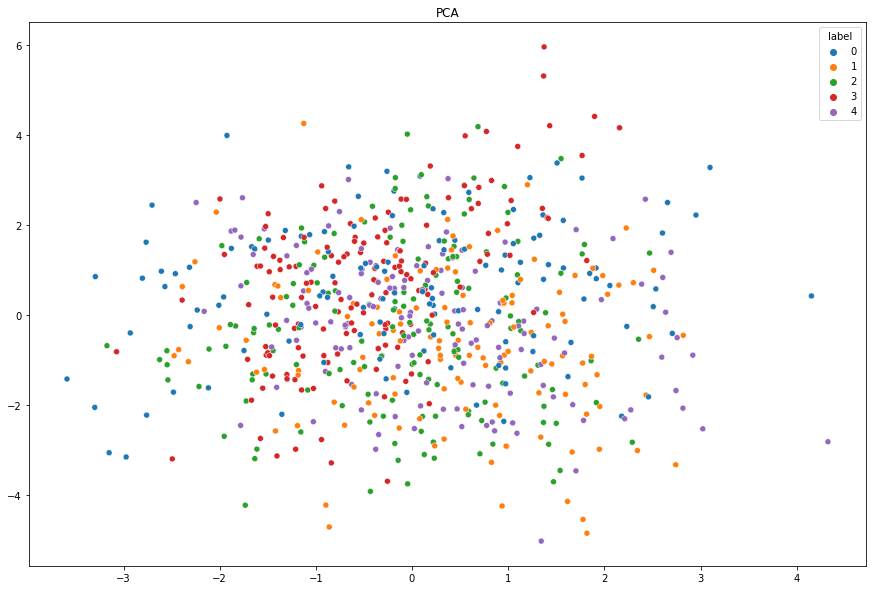

In [10]:
fig, ax =  plt.subplots(figsize=(15,10))
sns.scatterplot(x=X_train_scaled_pca[:,1], y=X_train_scaled_pca[:,0], hue=y_train, palette="tab10")
ax.set_title('PCA')

There seem to be no clear classification in 2 dimensions so in the next part we will be using SVM in higher dimension to create hyperplane

# Support Vector Machine (implemented by sklearn.svm.LinearSVC)


In [11]:
from sklearn.svm import LinearSVC
svm_clf1 = LinearSVC(C = 10**9, random_state=1,max_iter=10000)
svm_clf1.fit(X_train_scaled, y_train)
y_pred_svm1 = svm_clf1.predict(X_test_scaled)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test, y_pred_svm1))

Accuracy:  0.36


# Parameters tuning for LinearSVC

Looking at the document from the sklearn website these are the default setting for LinearSVC

class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

I will be focusing on [loss, C, multi_class]. 
The reason that I have pick these parameters is because I believe it to have the biggest impacts on the prediction

-'loss': ['hinge', 'squared_hinge']. This will change the loss function of the SVM. Note: this will mean we will have to use penalty =l2 since the combination of l1 and hinge is not possible.

-'C': [0.1,1, 10, 100]. This is the regularization parameters, when we increase C we are decreasing the strength of regularization

-'multi_class': ['ovr','crammer_singer']. Since our Y have more than two classes it is reasonable to include the multi_class strategy variable during our parameters tuning.

-I have also include 'max_iter' = 5000 to try to solve 'Liblinear failed to converge, increase the number of iterations'

In [13]:
from sklearn.model_selection import GridSearchCV
#Use grid search to search for the best value of C.
param_grid_SVM = [{'C': [0.1,1, 10, 100], 'multi_class': ['ovr','crammer_singer'],'loss': ['hinge', 'squared_hinge'],'max_iter':[5000]}]
grid_search_SVM = GridSearchCV(LinearSVC(random_state=1), param_grid_SVM, cv=5, scoring='accuracy',return_train_score=True)
grid_search_SVM.fit(X_train_scaled, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LinearSVC(random_state=1),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'loss': ['hinge', 'squared_hinge'],
                          'max_iter': [5000],
                          'multi_class': ['ovr', 'crammer_singer']}],
             return_train_score=True, scoring='accuracy')

In [14]:
print('The best set of parameters are', grid_search_SVM.best_params_)

The best set of parameters are {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 5000, 'multi_class': 'ovr'}


In [15]:
SVM = pd.DataFrame(grid_search_SVM.cv_results_)
SVM_result = SVM[['param_C','param_multi_class','param_loss','mean_test_score']]
SVM_result.head(5)

,param_C,param_multi_class,param_loss,mean_test_score
0,0.1,ovr,hinge,0.480000
1,0.1,crammer_singer,hinge,0.465714
2,0.1,ovr,squared_hinge,0.487143
3,0.1,crammer_singer,squared_hinge,0.465714
4,1,ovr,hinge,0.474286


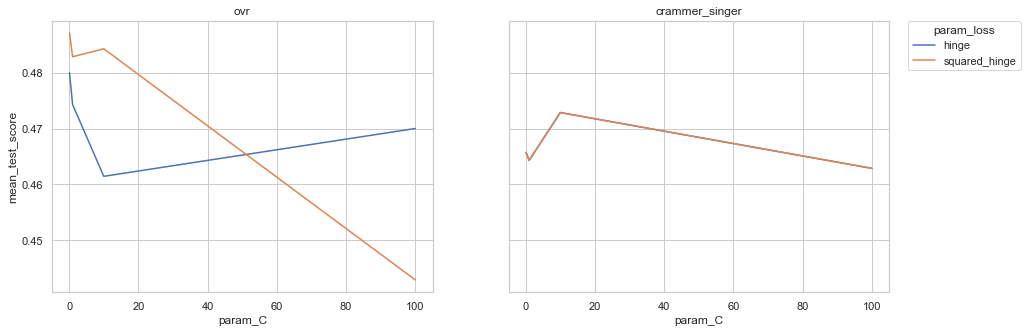

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2,sharex = True,sharey=True,figsize=(15,5))
z1 = SVM_result.loc[SVM_result['param_multi_class'] == 'ovr']
z2 = SVM_result.loc[SVM_result['param_multi_class'] == 'crammer_singer']
sns.lineplot(data = z1, x = 'param_C', y = 'mean_test_score', hue = 'param_loss', ax=axes[0]).set(title='ovr')
sns.lineplot(data = z2, x = 'param_C', y = 'mean_test_score', hue = 'param_loss',ax=axes[1]).set(title='crammer_singer')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.legend(title ='param_loss', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

looking at OVR and Crammer_singer we can see that there is a negative relationship between C and mean test score for both hinge and squared_hinge loss. The peak of mean test score is almost at zero on the OVR graph and on the suqared_hinge loss line. Due to negative relationship between C and mean test score there is no need to increase C in our GridSearch anymore

In [17]:
svm_clf2 = LinearSVC(C=0.1, loss = 'squared_hinge', multi_class = 'ovr', max_iter= 5000, random_state = 1)
svm_clf2.fit(X_train_scaled, y_train)
y_pred_svm2 = svm_clf2.predict(X_test_scaled)

In [18]:
print('Accuracy: ',accuracy_score(y_test, y_pred_svm2))

Accuracy:  0.44666666666666666


# Non-linear classification using LinearSVC

This might not be very optimal since we cannot use the kernel trick, and this will require a very long computational time. It would have been better to use SVC which will allow us to use the kernel trick. But since SVC wasn’t given in the instruction, we will be using LinearSVC

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
svm_clf_poly = LinearSVC(random_state=1)
svm_clf_poly.fit(X_train_poly, y_train)
y_pred_svm_poly = svm_clf_poly.predict(X_test_poly)

print('Accuracy: ',accuracy_score(y_test, y_pred_svm_poly))

Accuracy:  0.49666666666666665


AS you can see the accuracy score for the Non-linear classification is higher when compared to linear classification even without parameters tuning. 

It might yield better results with parameters tuning, but since we cannot run the kernel tricks the process will take too long so we will have to use SVC to run Grid Search and find the best parameters for non-linear SVM.


# SVC

In [20]:
from sklearn.svm import SVC
SVC_clf1 = SVC(random_state=1)
SVC_clf1.fit(X_train_scaled, y_train)
y_pred_SVC1 = SVC_clf1.predict(X_test_scaled)

In [21]:
print('Accuracy: ',accuracy_score(y_test, y_pred_SVC1))

Accuracy:  0.5


# Parameters tuning for Non-linear classification

In [22]:
param_grid_SVC = [{'C': [0.01,0.1,1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid'], 'degree' : [3,5,10]}]
grid_search_SVC = GridSearchCV(SVC(random_state=1), param_grid_SVC, cv=5, scoring='accuracy',return_train_score=True)
grid_search_SVC.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 5, 10],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [23]:
SVC_r = pd.DataFrame(grid_search_SVC.cv_results_)
SVC_result = SVC_r[['param_C','param_degree','param_kernel','mean_test_score']]
SVC_result.head(5)

,param_C,param_degree,param_kernel,mean_test_score
0,0.01,3,poly,0.22
1,0.01,3,rbf,0.22
2,0.01,3,sigmoid,0.22
3,0.01,5,poly,0.22
4,0.01,5,rbf,0.22


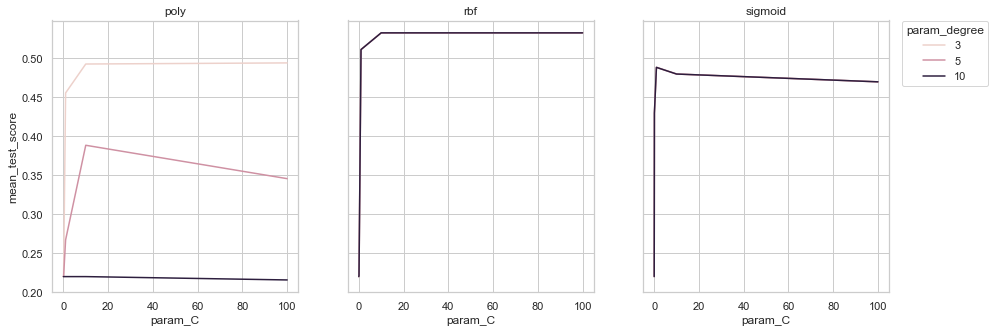

In [24]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,3,sharex = True,sharey=True,figsize=(15,5)) 
g1 = SVC_result.loc[SVC_result['param_kernel'] == 'poly']
g2 = SVC_result.loc[SVC_result['param_kernel'] == 'rbf']
g3 = SVC_result.loc[SVC_result['param_kernel'] == 'sigmoid']
sns.lineplot(data = g1, x = 'param_C', y = 'mean_test_score', hue = 'param_degree',ax=axes[0]).set(title='poly')
sns.lineplot(data = g2, x = 'param_C', y = 'mean_test_score', hue = 'param_degree', ax=axes[1]).set(title='rbf')
sns.lineplot(data = g3, x = 'param_C', y = 'mean_test_score', hue = 'param_degree', ax=axes[2]).set(title='sigmoid')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.legend(title ='param_degree', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

It is clear that the rbf is the best performing graph when compared to other model. After C=10 there is little to no change in mean test score of rbf. 

In [25]:
print('The best set of parameters are', grid_search_SVC.best_params_)

The best set of parameters are {'C': 10, 'degree': 3, 'kernel': 'rbf'}


In [26]:
SVC_clf2 = SVC(C = 10, kernel = 'rbf', degree = 3, random_state=1)
SVC_clf2.fit(X_train_scaled, y_train)
y_pred_SVC2 = SVC_clf2.predict(X_test_scaled)

SVC_clf1 = SVC(random_state=1)
SVC_clf1.fit(X_train_scaled, y_train)
y_pred_SVC1 = SVC_clf1.predict(X_test_scaled)

In [27]:
print('Accuracy: ',accuracy_score(y_test, y_pred_SVC2))

Accuracy:  0.5266666666666666


# Random Forest

Looking at the document from the sklearn website these are the default setting for the RandomForest

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

I will be focusing on [n_estimators, max_leaf_nodes, criterion]. 

-'n_estimators': [10,50,100,1000]. This will increase and decrease the number of trees in our random forest. Increasing this can help increase our accuracy.

-'max_lead_nodes':[10,50,100,150]. If this number is not given the default would unlimeted number of leaf nodes. By limiting it will help us to avoid overfitting. Also, since we limit the number of leaf nodes I will not change the max_features, min_weight_fraction_leaf,min_samples_leaf, min_samples_split and max_depth since these parameters also deal with overfitting the model.

-'criterion’: [“gini”, “entropy”]. This changes the measure quality of the split which could have an impact on the results.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf1 = RandomForestClassifier(random_state=1)
rf_clf1.fit(X_train_scaled, y_train)

y_pred_rf1 = rf_clf1.predict(X_test_scaled)

In [29]:
print('Accuracy: ',accuracy_score(y_test, y_pred_rf1))

Accuracy:  0.5233333333333333


# Parameters tuning for Random Forest

In [30]:
param_grid_rf = [{'n_estimators': [10,50,100,500], 'max_leaf_nodes':[10,50,100,500], 'criterion':['gini','entropy']}]
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_rf, cv=5, scoring='accuracy',return_train_score=True)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_leaf_nodes': [10, 50, 100, 500],
                          'n_estimators': [10, 50, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [31]:
RF = pd.DataFrame(grid_search_rf.cv_results_)
RF_result = RF[['param_criterion','param_max_leaf_nodes','param_n_estimators','mean_test_score']]
RF_result.head()

,param_criterion,param_max_leaf_nodes,param_n_estimators,mean_test_score
0,gini,10,10,0.452857
1,gini,10,50,0.525714
2,gini,10,100,0.531429
3,gini,10,500,0.538571
4,gini,50,10,0.437143


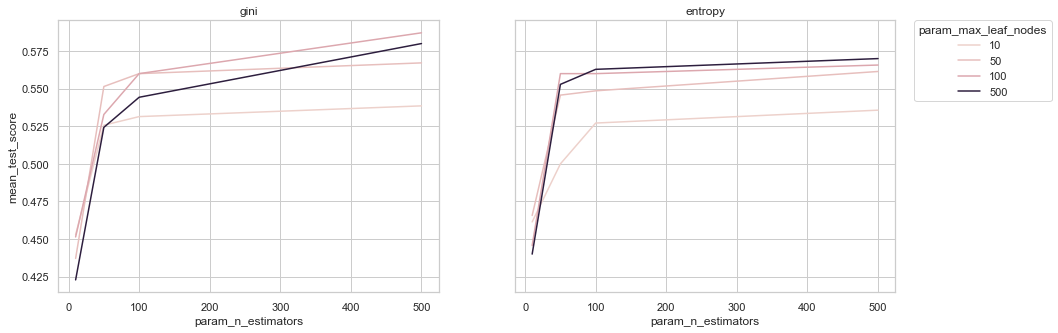

In [32]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2,sharex = True,sharey=True,figsize=(15,5))
l1 = RF_result.loc[RF_result['param_criterion'] == 'gini']
l2 = RF_result.loc[RF_result['param_criterion'] == 'entropy']
sns.lineplot(data = l1, x = 'param_n_estimators', y = 'mean_test_score', hue = 'param_max_leaf_nodes', ax=axes[0]).set(title='gini')
sns.lineplot(data = l2, x = 'param_n_estimators', y = 'mean_test_score', hue = 'param_max_leaf_nodes',ax=axes[1]).set(title='entropy')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.legend(title ='param_max_leaf_nodes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


In [33]:
print('The best set of parameters are', grid_search_rf.best_params_)

The best set of parameters are {'criterion': 'gini', 'max_leaf_nodes': 100, 'n_estimators': 500}


In [34]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, criterion = 'gini', random_state=1)
rf_clf2.fit(X_train_scaled, y_train)

y_pred_rf2 = rf_clf2.predict(X_test_scaled)

In [35]:
print('Accuracy: ',accuracy_score(y_test, y_pred_rf2))

Accuracy:  0.57


# Conclusion

I will be evaluating the models perfromance by using randomly generated number as a baseline

In [36]:
import random
from random import random
from random import seed
from random import randint
seed(1)
randomlist = []
for i in range(0,300):
    n = randint(1,4)
    randomlist.append(n)
print('Random accuracy: ',accuracy_score(y_test, randomlist))

Random accuracy:  0.21666666666666667


In conclusion I would use the Random Forrest to estimate the variables for the following reasons.

1) The accuracy score for random forest (0.57) is higher than the score of using LinearSVM (0.4466) and both random forest and LinearSVM scores are higher than the random accuracy score of (0.2166). Even if we look at the accuracy score of non-linear SVM (0.5266) we still have the same conclusion that Random Forest perform better in this data set.

2) Since looking at the PCA there are no clear clustering in 2 dimension the SVM is done in a much higher dimensions resulting in a hyperplane. This would be very difficult to interpret when compared to Random Forest which is essentially a group of decision trees.

3)Decisions trees should deal with multicollinearity problems better than SVM

The parameters that we will use for Random Forest is ['criterion': 'gini', 'max_leaf_nodes': 100, 'n_estimators': 500]
which give us an accuracy of 0.57 whihc is an 163% increase in accuracy from the random model